<a href="https://colab.research.google.com/github/GuilhermeFerracini/Machine_Learning/blob/main/Deep_Learning/Pytorch_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libs
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from sklearn.datasets import make_moons
from torchsummary import summary

In [ ]:
#Tipos de Tensores

#Tensor pode mudar o tipo da estrutura passada por padrão é float32
list = [[1,2],[3,4],[5,6]]
tns = torch.Tensor(list)
print(tns.dtype)
print(tns)
print('')

#Float32
tns = torch.FloatTensor(list)
print(tns.dtype)
print(tns)
print('')

#Float64
tns = torch.DoubleTensor(list)
print(tns.dtype)
print(tns)
print('')

#Int
tns = torch.LongTensor(list)
print(tns.dtype)
print(tns)
print('')

#Preserva o tipo do arr numpy para tns
arr = np.random.rand(3,2)
arr = arr.astype(int)
tns = torch.tensor(arr)
print(tns.dtype)
print(type(tns))
print(tns)
print('')

#Converter tensor para arr numpy
tns = torch.Tensor(list)
arr = tns.data.numpy()
print(tns.dtype)
print(tns)
print(type(arr))
print(arr)

torch.float32
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

torch.float32
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

torch.float64
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], dtype=torch.float64)

torch.int64
tensor([[1, 2],
        [3, 4],
        [5, 6]])

torch.int64
<class 'torch.Tensor'>
tensor([[0, 0],
        [0, 0],
        [0, 0]])

torch.float32
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
<class 'numpy.ndarray'>
[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [ ]:
#Manipulando tensores

arr = 10*np.random.rand(3,3)
arr = arr.astype(int)
tns = torch.LongTensor(arr)
print(tns)
print('')

#Mudando um elemento do tensor
tns[1,1] = 10
print(tns)
print('')

#Visualizando o conteudo
print(tns[1:2,1:2])
print(tns[2])
print(tns[:,2])
print('')

#Iniciando Tensores 0s e 1s
tns1= torch.ones(2,3)
tns0= torch.zeros(5,4)
tns_rand= torch.randn(4,4)
print(tns1)
print('')
print(tns0)
print('')
print(tns_rand)
print('')

#Dimensionamento de 4x3 para 2X2X3
arr = 10*np.random.rand(4,3)
tns = torch.LongTensor(arr)
print(tns.shape)
#print(tns.size())
print(tns.view(-1))
tns = tns.view(2,2,3)
print(tns)
#tns_out = torch.cat( (tns1, tns2), dim=0 ) concatenacao
#torch.squeeze() e torch.unsqueeze() Remover e add dimensoes

tensor([[7, 6, 1],
        [0, 7, 0],
        [8, 7, 0]])

tensor([[ 7,  6,  1],
        [ 0, 10,  0],
        [ 8,  7,  0]])

tensor([[10]])
tensor([8, 7, 0])
tensor([1, 0, 0])

tensor([[1., 1., 1.],
        [1., 1., 1.]])

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

tensor([[-1.4534,  0.4652,  0.3714, -0.0047],
        [ 0.0795, -0.4560, -0.0619, -0.2222],
        [-0.8435,  0.4351,  0.2659, -0.5871],
        [ 0.0827,  0.1858, -0.9698,  1.8932]])

torch.Size([4, 3])
tensor([0, 9, 3, 3, 8, 9, 9, 7, 3, 0, 7, 5])
tensor([[[0, 9, 3],
         [3, 8, 9]],

        [[9, 7, 3],
         [0, 7, 5]]])


In [ ]:
#Usando a gpu

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

cpu


In [ ]:
#Perceptron
torch.manual_seed(42)
perceptron = nn.Linear(3, 1)
print(perceptron)
print(perceptron.weight.data)
print(perceptron.bias.data)
print('')

#Entrada e saida
w1, w2, w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()
X = torch.Tensor([42, 33, 99])
y = perceptron(X)
print(y)

Linear(in_features=3, out_features=1, bias=True)
tensor([[ 0.4414,  0.4792, -0.1353]])
tensor([0.5304])

tensor([21.4927], grad_fn=<ViewBackward0>)


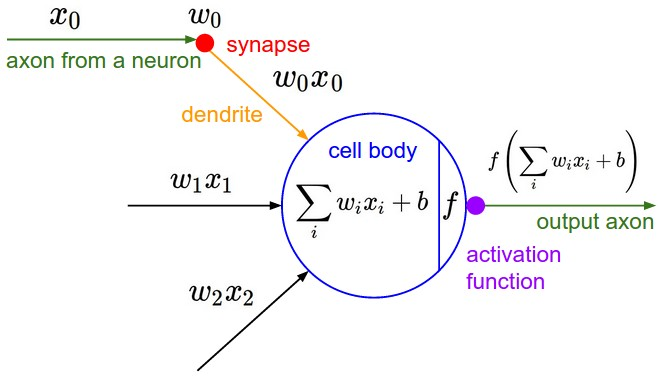


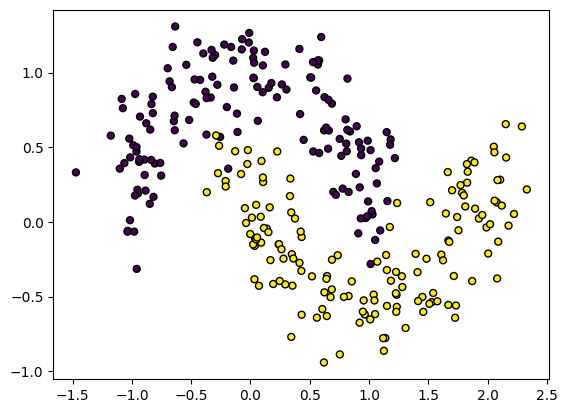

In [ ]:



X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o',
 c=Y1, s=25, edgecolor='k')

In [ ]:
input_size = 2
hidden_size = 8
output_size = 1

net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size), # hidden (escondida)
                    nn.ReLU(),   # ativação não linear
                    nn.Linear(in_features=hidden_size, out_features=output_size)) # output (saída)
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [ ]:
print(X1.shape)
tensor = torch.from_numpy(X1).float() #tensor recebe dados do numpy do tipo float32 padrao
pred   = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])


In [ ]:

summary(net, input_size=(1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
class MinhaRede(nn.Module):

  def __init__(self, input_size, hidden_size, output_size):
    super(MinhaRede, self).__init__()

    # Definir a arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu   = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, X):

    # Gerar uma saída a partir do X
    hidden = self.relu(self.hidden(X))
    output = self.output(hidden)

    return output

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

cpu


In [ ]:

input_size = 2
hidden_size = 8
output_size = 1

net = MinhaRede(input_size,hidden_size, output_size)  ## O método __init__()
net = net.to(device)
print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [ ]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
tensor = tensor.to(device)  #Conectar com GPU
pred   = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])
